# What Patents Reveal About Facebook?

In [1]:
import pandas as pd
import re
import time
import datetime
import numpy as np


import matplotlib.pyplot as plt
from cycler import cycler


% matplotlib inline

In [2]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

In [3]:
df_app = pd.read_csv('applications.csv')
df_app.head()

,abstract,applicant,date_filed,inventor,p_num,title,type,url
0,Techniques for coordinating a message experien...,"FACEBOOK, INC.","January 15, 2018","Jessica Lee, Robert Franklin Daniel, William A...",20180139167,TECHNIQUES FOR COORDINATING A MESSAGING EXPERI...,Application,https://patents.justia.com/patent/20180139167
1,Techniques to share application data through a...,"FACEBOOK, INC.","December 20, 2017","Alexander Salem Franklin, Matthew Steiner, Jon...",20180113753,TECHNIQUES TO SHARE APPLICATION DATA THROUGH A...,Application,https://patents.justia.com/patent/20180113753
2,Techniques for mobile device personalization a...,"FACEBOOK, INC.","October 17, 2017","Yael MAGUIRE, Fraidun AKHI",20180041627,TECHNIQUES FOR MOBILE DEVICE PERSONALIZATION,Application,https://patents.justia.com/patent/20180041627
3,Techniques for managing groups on a mobile pla...,"FACEBOOK, INC.","June 26, 2017","David Ross Ferguson, Jun Sun",20180020004,TECHNIQUES FOR MANAGING GROUPS ON A MOBILE PLA...,Application,https://patents.justia.com/patent/20180020004
4,Techniques to selectively capture media using ...,"FACEBOOK, INC.","September 21, 2017","William M. Ruben, Daniel J. Smith II, Nilesh V...",20180013956,TECHNIQUES TO SELECTIVELY CAPTURE VISUAL MEDIA...,Application,https://patents.justia.com/patent/20180013956


## Part 1: Combine the two datasets and map the number of patents filed annually

In [4]:
df_patent = pd.read_csv('patents.csv')
df_patent.head()

,abstract,assignee,date_filed,date_issued,inventor,p_num,title,type,url
0,A social networking system generates socially-...,"FACEBOOK, INC.","April 13, 2012","July 24, 2018","Timothy Kendall, Matthew R. Cohler, Mark E. Zu...",10032189,Sponsored stories and news stories within a ne...,Grant,https://patents.justia.com/patent/10032189
1,The various embodiments described herein inclu...,"FACEBOOK, INC.","August 3, 2015","July 24, 2018","Scott Snibbe, Graham McDermott, Justin Ponczek...",10031921,Methods and systems for storage of media item ...,Grant,https://patents.justia.com/patent/10031921
2,"In one embodiment, a method includes deploying...","FACEBOOK, INC.","January 26, 2016","July 24, 2018","Michael Dudley Johnson, Mathieu Benjamin Tozer...",10032186,Native application testing,Grant,https://patents.justia.com/patent/10032186
3,"In one embodiment, a method includes receiving...","FACEBOOK, INC.","October 9, 2015","July 24, 2018","Kittipat Virochsiri, Sriram Sankar",10032047,User search based on private information,Grant,https://patents.justia.com/patent/10032047
4,"In one embodiment, a method includes receiving...","FACEBOOK, INC.","October 17, 2012","July 24, 2018","Matthew Nicholas Papakipos, Michael John McKen...",10032233,Social context in augmented reality,Grant,https://patents.justia.com/patent/10032233


In [94]:
df_patent.head()

,abstract,assignee,date_filed,date_issued,inventor,p_num,title,type,url,filed_date,issued_date
0,A social networking system generates socially-...,"FACEBOOK, INC.","April 13, 2012","July 24, 2018","Timothy Kendall, Matthew R. Cohler, Mark E. Zu...",10032189,Sponsored stories and news stories within a ne...,Grant,https://patents.justia.com/patent/10032189,2012-04-13,2012-04-13
1,The various embodiments described herein inclu...,"FACEBOOK, INC.","August 3, 2015","July 24, 2018","Scott Snibbe, Graham McDermott, Justin Ponczek...",10031921,Methods and systems for storage of media item ...,Grant,https://patents.justia.com/patent/10031921,2015-08-03,2015-08-03
2,"In one embodiment, a method includes deploying...","FACEBOOK, INC.","January 26, 2016","July 24, 2018","Michael Dudley Johnson, Mathieu Benjamin Tozer...",10032186,Native application testing,Grant,https://patents.justia.com/patent/10032186,2016-01-26,2016-01-26
3,"In one embodiment, a method includes receiving...","FACEBOOK, INC.","October 9, 2015","July 24, 2018","Kittipat Virochsiri, Sriram Sankar",10032047,User search based on private information,Grant,https://patents.justia.com/patent/10032047,2015-10-09,2015-10-09
4,"In one embodiment, a method includes receiving...","FACEBOOK, INC.","October 17, 2012","July 24, 2018","Matthew Nicholas Papakipos, Michael John McKen...",10032233,Social context in augmented reality,Grant,https://patents.justia.com/patent/10032233,2012-10-17,2012-10-17


In [5]:
df = pd.concat([df_patent,df_app],axis = 0,ignore_index=True)

/Users/christina/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [6]:
df.head()

,abstract,applicant,assignee,date_filed,date_issued,inventor,p_num,title,type,url
0,A social networking system generates socially-...,NaN,"FACEBOOK, INC.","April 13, 2012","July 24, 2018","Timothy Kendall, Matthew R. Cohler, Mark E. Zu...",10032189,Sponsored stories and news stories within a ne...,Grant,https://patents.justia.com/patent/10032189
1,The various embodiments described herein inclu...,NaN,"FACEBOOK, INC.","August 3, 2015","July 24, 2018","Scott Snibbe, Graham McDermott, Justin Ponczek...",10031921,Methods and systems for storage of media item ...,Grant,https://patents.justia.com/patent/10031921
2,"In one embodiment, a method includes deploying...",NaN,"FACEBOOK, INC.","January 26, 2016","July 24, 2018","Michael Dudley Johnson, Mathieu Benjamin Tozer...",10032186,Native application testing,Grant,https://patents.justia.com/patent/10032186
3,"In one embodiment, a method includes receiving...",NaN,"FACEBOOK, INC.","October 9, 2015","July 24, 2018","Kittipat Virochsiri, Sriram Sankar",10032047,User search based on private information,Grant,https://patents.justia.com/patent/10032047
4,"In one embodiment, a method includes receiving...",NaN,"FACEBOOK, INC.","October 17, 2012","July 24, 2018","Matthew Nicholas Papakipos, Michael John McKen...",10032233,Social context in augmented reality,Grant,https://patents.justia.com/patent/10032233


In [7]:
df['filed_date'] = pd.to_datetime(df['date_filed'],format = '%B %d, %Y')


In [8]:
plt.rcParams.update({
  'lines.linewidth': 3,
  'lines.solid_capstyle': 'round',
  'font.family':'DIN ALTERNATE' ,
  'font.stretch':'normal',
  'legend.fancybox': False,
  'legend.frameon':False,
  'axes.prop_cycle': cycler('color', ['#00526d','#f0bb7f','#d9816b','#90ced6','#81ba9a','#f15b40']),
  'axes.facecolor': '#ffffff',
 'axes.grid': True,
  'axes.labelsize': 'large',
  'axes.axisbelow': True,
  'axes.formatter.limits':[-20,20],

  'axes.linewidth': 1.0,
  
    'axes.spines.left'   : False,
    'axes.spines.bottom' : False,
    'axes.spines.top'    : False,
    'axes.spines.right'  : False,
 
  'grid.linestyle': '--',
  'grid.linewidth': 1.0,
  'grid.color': '#efefef',

    'xtick.major.pad': 10,
    'ytick.major.pad': 35,
    'ytick.left'           : True,
    'ytick.direction'      : 'out',
  'xtick.major.size': 5,
  'xtick.minor.size': 2,
  'ytick.major.size': 0,
  'ytick.minor.size': 0,
    'xtick.minor.visible'  : True,
  'font.size': 14.0,
  'figure.facecolor': '#ffffff',
'savefig.facecolor'   :  '#ffffff'  # figure facecolor when saving

})

In [9]:
years = []

for i in range(2004,2019):
    
    years.append(i)
years


[2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018]

In [13]:
df.head()

,abstract,applicant,assignee,date_filed,date_issued,inventor,p_num,title,type,url,filed_date
0,A social networking system generates socially-...,NaN,"FACEBOOK, INC.","April 13, 2012","July 24, 2018","Timothy Kendall, Matthew R. Cohler, Mark E. Zu...",10032189,Sponsored stories and news stories within a ne...,Grant,https://patents.justia.com/patent/10032189,2012-04-13
1,The various embodiments described herein inclu...,NaN,"FACEBOOK, INC.","August 3, 2015","July 24, 2018","Scott Snibbe, Graham McDermott, Justin Ponczek...",10031921,Methods and systems for storage of media item ...,Grant,https://patents.justia.com/patent/10031921,2015-08-03
2,"In one embodiment, a method includes deploying...",NaN,"FACEBOOK, INC.","January 26, 2016","July 24, 2018","Michael Dudley Johnson, Mathieu Benjamin Tozer...",10032186,Native application testing,Grant,https://patents.justia.com/patent/10032186,2016-01-26
3,"In one embodiment, a method includes receiving...",NaN,"FACEBOOK, INC.","October 9, 2015","July 24, 2018","Kittipat Virochsiri, Sriram Sankar",10032047,User search based on private information,Grant,https://patents.justia.com/patent/10032047,2015-10-09
4,"In one embodiment, a method includes receiving...",NaN,"FACEBOOK, INC.","October 17, 2012","July 24, 2018","Matthew Nicholas Papakipos, Michael John McKen...",10032233,Social context in augmented reality,Grant,https://patents.justia.com/patent/10032233,2012-10-17


In [14]:
df['year_f'] = df['date_filed'].str.extract(r',\s(\d+)$')

In [15]:
df0418 = df[~df.year_f.isin(['2001','2002','2003'])]

In [19]:
df0418.resample('A',on='filed_date').count()

,abstract,applicant,assignee,date_filed,date_issued,inventor,p_num,title,type,url,filed_date,year_f
filed_date,,,,,,,,,,,,
2004-12-31,6,0,6,6,6,6,6,6,6,6,6,6
2005-12-31,1,0,1,1,1,1,1,1,1,1,1,1
2006-12-31,13,0,13,13,13,13,13,13,13,13,13,13
2007-12-31,16,0,16,16,16,16,16,16,16,16,16,16
2008-12-31,28,6,22,28,22,28,28,28,28,28,28,28
2009-12-31,51,8,43,51,43,51,51,51,51,51,51,51
2010-12-31,130,8,122,130,122,130,130,130,130,130,130,130
2011-12-31,254,2,252,254,252,254,254,254,254,254,254,254
2012-12-31,709,185,524,709,524,709,709,709,709,709,709,709


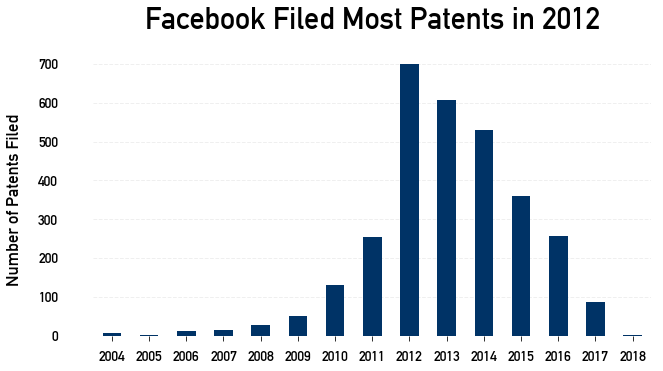

In [18]:
# import matplotlib.dates as mdates

# years = mdates.YearLocator()   # every year
# yearsFmt = mdates.DateFormatter('%Y')

# ax.xaxis.set_major_locator(years)
# ax.xaxis.set_major_formatter(yearsFmt)

# labels = [ i.strftime("%Y") for i in df.filed_date ]
# ax.set_xticklabels(labels)
ax = df0418.resample('A',on='filed_date').count().filed_date.plot(kind='bar',figsize=(10,5),color = '#003366')
plt.title("Facebook Filed Most Patents in 2012",pad = 35,loc='center',fontsize=30)

ax.grid(False, axis='x')
ax.set_ylabel("Number of Patents Filed",labelpad = 15)
ax.set_xlabel("")
ax.set_ylim(0,700)
plt.minorticks_off()


label = years
ax.set_xticklabels(label,rotation= 'horizontal')

plt.savefig("num_patents.pdf",bbox_inches='tight')
plt.savefig("num_patents.png",dpi = 600, bbox_inches='tight')
plt.minorticks_off()
plt.show()                      

In [16]:
df0418.head()

,abstract,applicant,assignee,date_filed,date_issued,inventor,p_num,title,type,url,filed_date,year_f
0,A social networking system generates socially-...,NaN,"FACEBOOK, INC.","April 13, 2012","July 24, 2018","Timothy Kendall, Matthew R. Cohler, Mark E. Zu...",10032189,Sponsored stories and news stories within a ne...,Grant,https://patents.justia.com/patent/10032189,2012-04-13,2012
1,The various embodiments described herein inclu...,NaN,"FACEBOOK, INC.","August 3, 2015","July 24, 2018","Scott Snibbe, Graham McDermott, Justin Ponczek...",10031921,Methods and systems for storage of media item ...,Grant,https://patents.justia.com/patent/10031921,2015-08-03,2015
2,"In one embodiment, a method includes deploying...",NaN,"FACEBOOK, INC.","January 26, 2016","July 24, 2018","Michael Dudley Johnson, Mathieu Benjamin Tozer...",10032186,Native application testing,Grant,https://patents.justia.com/patent/10032186,2016-01-26,2016
3,"In one embodiment, a method includes receiving...",NaN,"FACEBOOK, INC.","October 9, 2015","July 24, 2018","Kittipat Virochsiri, Sriram Sankar",10032047,User search based on private information,Grant,https://patents.justia.com/patent/10032047,2015-10-09,2015
4,"In one embodiment, a method includes receiving...",NaN,"FACEBOOK, INC.","October 17, 2012","July 24, 2018","Matthew Nicholas Papakipos, Michael John McKen...",10032233,Social context in augmented reality,Grant,https://patents.justia.com/patent/10032233,2012-10-17,2012


In [68]:
df.to_csv('allpatents.csv',index=False)

In [248]:
# df['year_f'] = df['date_filed'].str.extract(r',\s(\d+)$')

In [249]:
# df['year_filed'] = pd.to_datetime(df['year_f'],format = "%Y")

In [250]:
# dates = df['year_filed'].reset_index()

In [251]:
# dates.dtypes

index                  int64
year_filed    datetime64[ns]
dtype: object

In [ ]:
# ax = dates.resample('A',on='year_filed').count().year_filed.plot(kind='bar',figsize=(10,5))

## Analyzing the titles of the patents

### 1.Tokenizing (or phrasing?)

In [30]:
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import math

In [31]:
def tokenize(s):
    blob = TextBlob(s.lower())
    words = [token for token in blob.words if len(token)>=2]
    return words

In [151]:
df.title.apply(tokenize)

0       [sponsored, stories, and, news, stories, withi...
1       [methods, and, systems, for, storage, of, medi...
2                          [native, application, testing]
3         [user, search, based, on, private, information]
4               [social, context, in, augmented, reality]
5       [depth, mapping, with, head, mounted, display,...
6       [encouraging, support, of, an, entity, based, ...
7               [scrolling, 3d, presentation, of, images]
8       [methods, and, systems, for, accessing, releva...
9       [ranking, search, results, using, diversity, g...
10      [social, network, site, recommender, system, a...
11      [proximity, synchronization, of, audio, conten...
12      [managing, electronic, messages, sent, to, rep...
13                                [group, video, session]
14          [fine, and, coarse, parameter, beam, forming]
15      [data, replication, in, tree, based, server, a...
16                           [seamless, codec, switching]
17            

### 2. Counting vs TF-IDF on title analysis

In [33]:
def print_sorted_vector(v):
    sorted_list = sorted(v.items(), key=lambda x: (x[1],x[0]), reverse=True) 
    sorted_list = sorted_list[:20]
    print('\n'.join([str(x) for x in sorted_list]))

***Counting***

In [115]:
# Count Vectorizer with stop words
vectorizer = CountVectorizer(stop_words='english', tokenizer=tokenize)

matrix = vectorizer.fit_transform(df.title)

#convert matrix to a dataframe
results = pd.DataFrame(matrix.toarray(), columns=vectorizer.get_feature_names())
results.head()



,'s,3d,access,accessibility,accessible,accessing,according,account,accounting,accounts,...,world,world-wide,writ,zero,zero-forcing,zero-rated,zones,zoom,zooming,überfeed
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
total = []
for i in range(2001,2019,1):
    year = results[df['date_filed'].str.contains(str(i))].sum(axis=0)
    total.append(year)

In [36]:
big_table = pd.DataFrame(total)
big_table

,'s,3d,access,accessibility,accessible,accessing,according,account,accounting,accounts,...,world,world-wide,writ,zero,zero-forcing,zero-rated,zones,zoom,zooming,überfeed
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,4,0,7,0,0,0,0,2,1,0,...,0,1,0,0,0,0,0,0,0,0


In [85]:
def return_sorted_vector(v):
    sorted_list = sorted(v.items(), key=lambda x: (x[1],x[0]), reverse=True) 
    sorted_list = sorted_list[:20]
    return sorted_list

In [103]:
type(return_sorted_vector(big_table.iloc[7,:])[1][1])

int

In [116]:
big_list = []
for i in range(0,18):
    year = return_sorted_vector(big_table.iloc[i,:])
    big_list.append(year)

In [118]:
df_counting=pd.DataFrame(big_list).T
df_counting.columns=years
df_counting

df_counting.to_csv('title_tf_lem.csv',index=False)

***tf-idf***

In [93]:
vectorizer = TfidfVectorizer(stop_words='english', tokenizer=tokenize)

matrix = vectorizer.fit_transform(df.title)

# The easiest way to see what happenned is to make a dataframe
tfidf = pd.DataFrame(matrix.toarray(), columns=vectorizer.get_feature_names())
tfidf.head()

,'s,3d,access,accessibility,accessible,accessing,according,account,accounting,accounts,...,world,world-wide,writ,zero,zero-forcing,zero-rated,zones,zoom,zooming,überfeed
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [94]:
total = []
for i in range(2001,2019,1):
    year = tfidf[df['date_filed'].str.contains(str(i))].sum(axis=0)
    total.append(year)


In [95]:
big_tfidf = pd.DataFrame(total)

In [96]:
big_list = []
for i in range(0,18):
    year = return_sorted_vector(big_tfidf.iloc[i,:])
    big_list.append(year)

In [97]:
df_tfidf=pd.DataFrame(big_list).T
df_tfidf.columns=years
df_tfidf

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,"(synchronizing, 0.5839429632218833)","(recommendations/suggestions, 0.455504377182228)","(linking, 0.7361398851154309)","(managing, 1.6891254365922808)","(recipient, 0.637876408493387)","(network, 1.8507463639142032)","(network, 2.23329664992162)","(network, 3.1070903145257276)","(documents, 2.1058719027765385)","(social, 10.602978347974855)","(social, 18.057242818871913)","(social, 28.83278917896212)","(social, 32.886892059852684)","(social, 27.504739653326343)","(social, 14.950245694443185)","(social, 12.111044746044538)","(techniques, 4.766172078074932)","(location-based, 0.573589279511479)"
1,"(playback, 0.4711470930418158)","(multidimensional, 0.455504377182228)","(account, 0.6768294242586088)","(network, 1.1361802276825956)","(sender, 0.4334263510456446)","(social, 1.566957581625265)","(web-based, 1.725691605693201)","(social, 2.901808961681614)","(web, 2.0889701412430077)","(user, 6.646052636282327)","(networking, 12.51682236035901)","(user, 28.639866981723976)","(networking, 22.73651522855385)","(user, 16.684228740572838)","(techniques, 12.88677526025251)","(user, 10.840670747249886)","(systems, 4.4758275540971795)","(aggregation, 0.5632859721126039)"
2,"(proximity, 0.4475657678922647)","(arrangement, 0.43738842860626964)","(wallet, 0.6368328475739592)","(method, 0.798813136700938)","('s, 0.35548948001631053)","(relationships, 1.114443082454123)","(social, 1.6599841362714893)","(applications, 1.7246214138055196)","(apparatus, 1.8643809196789127)","(information, 6.598015792071203)","(user, 8.327480673090347)","(networking, 23.09801824416323)","(user, 22.60281955273093)","(content, 16.16219929149629)","(user, 12.457648493698915)","(methods, 7.997801785534893)","(methods, 4.353502224195301)","(coordinating, 0.5431355072456925)"
3,"(audio, 0.3896288146857043)","(process, 0.41185543315322803)","(method, 0.6033349315362726)","(social, 0.7471414412528226)","(option, 0.22143208581280688)","(generating, 1.106614112080769)","(environment, 1.1893361715890745)","(topics, 1.610472032793525)","(information, 1.856118879383573)","(networking, 6.300378984434509)","(interface, 7.541773790326531)","(based, 21.314431033915312)","(content, 16.301304576138737)","(online, 15.37467740963411)","(systems, 10.712369030156655)","(networking, 7.97486785018698)","(processing, 3.122704315583138)","(platforms, 0.5272697064258032)"
4,"(device, 0.29138514478180466)","(software, 0.38291771041972145)","(conversion, 0.5604443072180967)","(members, 0.7468653561625579)","(e-mail, 0.2126254694977957)","(remote, 1.0633471200495461)","(geographic, 1.175925498346691)","(sharing, 1.4566320145165013)","(social, 1.821552437141977)","(network, 5.037989961264687)","(content, 7.086890300858096)","(users, 14.459848950767652)","(systems, 15.844189401755559)","(based, 15.330079569607046)","(based, 9.9625539106197)","(systems, 7.7999027539613905)","(requests, 2.6777585222473266)","(distribution, 0.49907677729078714)"
5,"(überfeed, 0.0)","(providing, 0.27833795372906756)","(distributing, 0.5428471172971461)","(online, 0.7289523422287165)","(address, 0.1977629477734181)","(members, 0.9793040634995416)","(giving, 0.9692593322701835)","(community, 1.284847235342299)","(rendering, 1.7023666269021995)","(search, 4.949635806723191)","(data, 6.796887528957135)","(sharing, 13.842239030488681)","(methods, 15.434036463496874)","(systems, 14.041325770669156)","(networking, 9.53530050816484)","(screen, 7.001495675744805)","(social, 2.6038592638574127)","(experience, 0.48547729927354577)"
6,"(zooming, 0.0)","(überfeed, 0.0)","(targeted, 0.5164303563917656)","(forwarded, 0.6595206000849255)","(status, 0.1895507641606536)","(dynamically, 0.9489978666128012)","(gifts, 0.9692593322701835)","(translation, 1.242819712015122)","(method, 1.6870452318605969)","(results, 4.322025498520513)","(display, 6.34789177041789)","(methods, 13.275791407562677)","(online, 12.769087633978101)","(networking, 13.732

## Is phrase a better parameter?

In [69]:
def phrase(s):
    blob = TextBlob(s.lower())
    phrase = [phrase for phrase in blob.noun_phrases]
    return phrase

In [70]:
# Is phrase a better parameter?
df.title.head(50).apply(phrase)

0                                        [news stories]
1                                 [media item metadata]
2                                  [native application]
3                    [user search, private information]
4                                      [social context]
5                                      [stereo cameras]
6                   [encouraging support, post content]
7                                     [3d presentation]
8                                    [relevant content]
9                    [search results, diversity groups]
10             [social network site recommender system]
11    [proximity synchronization, audio content, mul...
12             [electronic messages, telephone numbers]
13                                [group video session]
14                              [coarse parameter beam]
15              [data replication, server architecture]
16                                     [seamless codec]
17                    [predicted-location notifi

In [71]:
vectorizer = TfidfVectorizer(stop_words='english', tokenizer=phrase)

matrix = vectorizer.fit_transform(df.title)

# The easiest way to see what happenned is to make a dataframe
tfidf_phrase = pd.DataFrame(matrix.toarray(), columns=vectorizer.get_feature_names())
tfidf_phrase.head()

,-d tree,3d character motion data,3d presentation,access control,access patterns,account access,account information,account recovery,account registration,action types,...,wireless datagram transaction protocol system,wireless device,wireless devices,wireless mesh,wireless phone,wireless radio,wireless radio subsystem,wireless transmitter location detection,writ response system,zoom interactions
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [101]:
total = []
for i in range(2001,2019,1):
    year = tfidf_phrase[df['date_filed'].str.contains(str(i))].sum(axis=0)
    total.append(year)


big_tfidfp = pd.DataFrame(total)

big_list = []
for i in range(0,18):
    year = return_sorted_vector(big_tfidfp.iloc[i,:])
    big_list.append(year)

df_tfidfp=pd.DataFrame(big_list).T
df_tfidfp.columns = years
df_tfidfp

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,"(audio playback device, 1.0)","(software arrangement, 0.7071067811865476)","(internet advertisements, 1.0)","(social network, 2.454983516800501)","(sender 's, 0.5)","(social network, 3.5686491393889277)","(social network, 2.9442770891906713)","(social network, 3.4999157404259513)","(dynamic web pages, 3.0)","(search results, 8.009580853409854)","(graphical user interface, 8.219355409764336)","(display navigation, 18.249588558103817)","(social networks, 11.372142785060051)","(social networks, 19.72024619055787)","(social networks, 9.040205436343154)","(display screen, 10.842305014438498)","(natural language processing, 4.0)","(content aggregation, 1.0)"
1,"(zoom interactions, 0.0)","(multidimensional recommendations/suggestions,...","(electronic wallet conversion, 1.0)","(pay-per-click search engines, 1.0)","(recipient 's address, 0.5)","(social network environment, 1.1811105782712212)","(social network environment, 2.6525434396026615)","(significant topics, 2.0)","(textual content, 2.0)","(social network, 4.663060946229147)","(display panel, 7.147576623123212)","(definable co-user, 10.527055603709435)","(social network, 10.177763159923625)","(social network, 15.061945215009391)","(graphical user interface, 5.250264474565749)","(graphical user interface, 9.603566034842576)","(graphical user interface, 2.89355990132902)","(zoom interactions, 0.0)"
2,"(writ response system, 0.0)","(zoom interactions, 0.0)","(zoom interactions, 0.0)","(electronic messages, 1.0)","(online status, 0.5)","(remote work sessions, 1.0)","(geographic location notification, 2.0)","(demographic information, 2.0)","(setting cookies, 2.0)","(social graph, 3.267680665574835)","(social network, 6.992357222344677)","(social network, 10.141442682703207)","(user interface, 10.046842841505322)","(mobile device, 10.781143044249129)","(search queries, 3.9330135378731317)","(social networks, 5.455087326209794)","(transform network resource requests, 2.855226...","(writ response system, 0.0)"
3,"(wireless transmitter location detection, 0.0)","(writ response system, 0.0)","(writ response system, 0.0)","(search results, 0.9278034188209514)","(instant message, 0.5)","(remote electronic content, 1.0)","(social network members, 1.0)","(community translation, 1.7124159479611225)","(predictive resource identification, 2.0)","(social network information, 2.538644292141596)","(computer system, 5.6331938213996535)","(mobile device, 7.404719400665352)","(search queries, 9.94604552672691)","(search queries, 8.985616245218406)","(search results, 3.7504369409083838)","(social network, 3.769092280868028)","(network requests, 2.801370882590806)","(wireless transmitter location detection, 0.0)"
4,"(wireless radio subsystem, 0.0)","(wireless transmitter location detection, 0.0)","(wireless transmitter location detection, 0.0)","(information flow, 0.8477682516719212)","(zoom interactions, 0.0)","(privacy summary, 1.0)",(electronic message system recipient recommend...,"(digital content, 1.7036129453651954)","(network resources, 2.0)","(display panel, 2.3917986760961933)","(search results, 4.539163310536412)","(mobile devices, 7.308886240055207)","(intelligent results, 8.563984853099695)","(computer system users, 8.0)","(social network, 3.5481038119597015)","(third-party communication service, 3.0)","(computer system, 2.7855483611811094)","(wireless radio subsystem, 0.0)"
5,"(wireless radio, 0.0)","(wireless radio subsystem, 0.0)","(wireless radio subsystem, 0.0)","(individual 's, 0.834143672020649)","(writ response system, 0.0)","(digital media, 1.0)","(external sources, 0.8898713594490271)","(social network applications, 1.4142135623730951)","(form filling, 2.0)","(computer system, 2.3807311482414795)","(system user information, 3.9464788415063197)","(search results, 7.131001991703378)","(online system, 7.677809435042109)","(graphical user interface, 7.34105023883482)","(display screen, 3.525

In [ ]:
#Now let's try how to glue titles together for each year

In [104]:
df.groupby(pd.to_datetime(df.filed_date).dt.year).title.apply(lambda titles: ' '.join(titles))

filed_date
2001        Proximity synchronizing audio playback device
2002    System, process and software arrangement for p...
2003    Account linking Method of distributing targete...
2004    System for managing bids for pay-per-click sea...
2005    Presenting a recipient of an e-mail with an op...
2006    Method and system for tracking changes to user...
2007    Systems and methods for training statistical s...
2008    Sharing digital content on a social network Tr...
2009    Cooling servers in a data center using fans ex...
2010    Method and apparatus for trust-based, fine-gra...
2011    Proximity synchronization of audio content amo...
2012    Sponsored stories and news stories within a ne...
2013    Ranking search results using diversity groups ...
2014    Methods and systems for accessing relevant con...
2015    Methods and systems for storage of media item ...
2016    Native application testing Social network site...
2017    Depth mapping with a head mounted display usin...
201

In [105]:
df_title = df.groupby(pd.to_datetime(df.filed_date).dt.year).title.apply(lambda titles: ' '.join(titles)).reset_index()

In [106]:
df_title

,filed_date,title
0,2001,Proximity synchronizing audio playback device
1,2002,"System, process and software arrangement for p..."
2,2003,Account linking Method of distributing targete...
3,2004,System for managing bids for pay-per-click sea...
4,2005,Presenting a recipient of an e-mail with an op...
5,2006,Method and system for tracking changes to user...
6,2007,Systems and methods for training statistical s...
7,2008,Sharing digital content on a social network Tr...
8,2009,Cooling servers in a data center using fans ex...
9,2010,"Method and apparatus for trust-based, fine-gra..."


In [ ]:
# term frequency

In [107]:
# Count Vectorizer with stop words
vectorizer = CountVectorizer(stop_words='english', tokenizer=tokenize)

matrix = vectorizer.fit_transform(df_title.title)

#convert matrix to a dataframe
results = pd.DataFrame(matrix.toarray(), columns=vectorizer.get_feature_names())
results.head()





,'s,3d,access,accessibility,accessible,accessing,according,account,accounting,accounts,...,world,world-wide,writ,zero,zero-forcing,zero-rated,zones,zoom,zooming,überfeed
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [108]:
big_list = []
for i in range(0,18):
    year = return_sorted_vector(results.iloc[i,:])
    big_list.append(year)

df_counting=pd.DataFrame(big_list).T
df_counting

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,"(synchronizing, 1)","(software, 1)","(method, 2)","(social, 4)","(recipient, 3)","(social, 9)","(social, 10)","(social, 14)","(social, 10)","(social, 59)","(social, 96)","(social, 153)","(social, 174)","(social, 152)","(social, 76)","(social, 66)","(systems, 17)","(techniques, 1)"
1,"(proximity, 1)","(recommendations/suggestions, 1)","(wallet, 1)","(network, 4)","(sender, 2)","(network, 7)","(network, 9)","(network, 9)","(using, 7)","(user, 31)","(networking, 52)","(user, 131)","(networking, 101)","(user, 78)","(user, 57)","(user, 50)","(techniques, 16)","(platforms, 1)"
2,"(playback, 1)","(providing, 1)","(targeted, 1)","(managing, 4)","('s, 2)","(user, 3)","(web-based, 4)","(topics, 4)","(user, 7)","(networking, 27)","(user, 38)","(networking, 99)","(user, 98)","(based, 69)","(based, 47)","(networking, 35)","(methods, 16)","(messaging, 1)"
3,"(device, 1)","(process, 1)","(linking, 1)","(search, 3)","(status, 1)","(generating, 3)","(systems, 4)","(information, 4)","(method, 7)","(information, 23)","(content, 27)","(based, 93)","(content, 61)","(content, 62)","(systems, 45)","(systems, 33)","(social, 13)","(location-based, 1)"
4,"(audio, 1)","(multidimensional, 1)","(internet, 1)","(results, 2)","(presenting, 1)","(content, 3)","(speech, 3)","(applications, 4)","(information, 7)","(network, 18)","(interface, 24)","(systems, 48)","(systems, 59)","(networking, 61)","(techniques, 44)","(methods, 33)","(user, 11)","(experience, 1)"
5,"(überfeed, 0)","(arrangement, 1)","(electronic, 1)","(online, 2)","(option, 1)","(systems, 2)","(methods, 3)","(user, 3)","(web, 6)","(search, 17)","(network, 22)","(methods, 48)","(methods, 57)","(systems, 58)","(networking, 39)","(content, 25)","(network, 11)","(distribution, 1)"
6,"(zooming, 0)","(überfeed, 0)","(distributing, 1)","(method, 2)","(online, 1)","(remote, 2)","(geographic, 3)","(systems, 3)","(documents, 6)","(based, 16)","(data, 21)","(users, 46)","(online, 44)","(online, 54)","(methods, 38)","(based, 23)","(based, 11)","(coordinating, 1)"
7,"(zoom, 0)","(zooming, 0)","(conversion, 1)","(members, 2)","(message, 1)","(relationships, 2)","(environment, 3)","(sharing, 3)","(networking, 5)","(using, 14)","(based, 21)","(using, 45)","(based, 42)","(methods, 51)","(data, 29)","(techniques, 22)","(requests, 9)","(content, 1)"
8,"(zones, 0)","(zoom, 0)","(advertisements, 1)","(based, 2)","(instant, 1)","(providing, 2)","(users, 2)","(providing, 3)","(network, 5)","(users, 14)","(information, 20)","(content, 45)","(data, 40)","(network, 48)","(online, 28)","(using, 20)","(processing, 8)","(aggregation, 1)"
9,"(zero-rated, 0)","(zones, 0)","(account, 1)","(separation, 1)","(e-mail, 1)","(newsfeed, 2)","(time, 2)","(networking, 3)","(data, 5)","(results, 14)","(display, 18)","(information, 43)","(information, 37)","(techniques, 42)","(content, 28)","(network, 19)","(networking, 7)","(überfeed, 0)"


In [109]:
#tf-idf

In [121]:
#remove puctuation
df_title.title = df_title.title.str.replace('[^\w\s]','')

#lemnization
from textblob import Word
df_title.title = df_title.title.apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))



In [111]:
vectorizer = TfidfVectorizer(stop_words='english', tokenizer=tokenize)

matrix = vectorizer.fit_transform(df_title.title)

# The easiest way to see what happenned is to make a dataframe
tfidf = pd.DataFrame(matrix.toarray(), columns=vectorizer.get_feature_names())
tfidf.shape



(18, 2129)

In [113]:
big_list = []
for i in range(0,18):
    year = return_sorted_vector(tfidf.iloc[i,:])
    big_list.append(year)

df_tfidf=pd.DataFrame(big_list).T
df_tfidf.columns = years
df_tfidf.to_csv('title_tfidf_lem.csv',index= False)

In [120]:
df_tfidf

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,"(synchronizing, 0.6808966887487482)","(recommendationssuggestions, 0.5335102437351632)","(distributing, 0.4313723557742661)","(managing, 0.37652643865605406)","(recipient, 0.637410552200256)","(social, 0.4764684705220462)","(social, 0.4286073352755911)","(social, 0.4937219221597386)","(social, 0.23319286323145977)","(social, 0.5361149888872111)","(social, 0.5575698183234109)","(user, 0.4309739548491713)","(social, 0.5007447687033797)","(social, 0.4690721725901003)","(user, 0.36195560744682864)","(social, 0.41149019032028084)","(techniques, 0.3626890611378513)","(platforms, 0.4674111820469513)"
1,"(playback, 0.4185387676906797)","(arrangement, 0.47957817081433807)","(wallet, 0.37757637260725185)","(social, 0.3367590382885096)","(sender, 0.5049794503607075)","(network, 0.37058658818381374)","(network, 0.385746601748032)","(network, 0.3173926642455462)","(using, 0.20531009164953015)","(user, 0.41290993040531854)","(networking, 0.3376817451595556)","(social, 0.39243198525439554)","(user, 0.3375756290561616)","(user, 0.32611968617775033)","(social, 0.361539265001524)","(user, 0.39531904305908067)","(user, 0.23473762616390215)","(coordinating, 0.4674111820469513)"
2,"(proximity, 0.3659076374658886)","(multidimensional, 0.4035651833140305)","(targeted, 0.37757637260725185)","(network, 0.3367590382885096)","(option, 0.25248972518035373)","(remote, 0.23083018433876915)","(webbased, 0.2827232108783772)","(application, 0.1971517315488219)","(web, 0.19989744417643657)","(networking, 0.2743127020308395)","(user, 0.3253005726566544)","(networking, 0.2839124106117217)","(networking, 0.324986082220372)","(network, 0.24996609197235609)","(techniques, 0.2990441362943075)","(networking, 0.24398313712055558)","(systems, 0.2306180559163411)","(experience, 0.3282472281098668)"
3,"(audio, 0.3659076374658886)","(process, 0.37466638668626384)","(internet, 0.3394075151209025)","(search, 0.31767096766744596)","(email, 0.25248972518035373)","(member, 0.19976063711181255)","(geographic, 0.19685831725301642)","(forum, 0.18924534696837)","(user, 0.19714518572805292)","(information, 0.22085879998424013)","(interface, 0.17202545980624923)","(based, 0.2259297732485548)","(content, 0.1855145348867194)","(networking, 0.21047578236021636)","(based, 0.2117665140997844)","(techniques, 0.19596520572152396)","(method, 0.22541486323123555)","(techniques, 0.3063154406698964)"
4,"(device, 0.30566027036437216)","(software, 0.3496331103932054)","(method, 0.3280812507047351)","(result, 0.22537096405732376)","(address, 0.23046538240096995)","(product, 0.18939618792129137)","(giving, 0.18687901655274797)","(user, 0.18633966654823764)","(information, 0.17250203751204632)","(search, 0.19429063211838796)","(content, 0.17185690630917588)","(method, 0.1627666108349803)","(method, 0.1553672860575475)","(content, 0.20219420543020522)","(networking, 0.20743531802249024)","(network, 0.18080629574679008)","(network, 0.22212721635039034)","(locationbased, 0.2869702331402038)"
5,"(überfeed, 0.0)","(providing, 0.24472132626513116)","(conversion, 0.30980144917274527)","(member, 0.21178064511163067)","(status, 0.19725546066473015)","(generating, 0.1881644637852452)","(speech, 0.18370525943545482)","(topics, 0.17567210947323952)","(apparatus, 0.1560608459534104)","(network, 0.1635605050842339)","(device, 0.16234699286517099)","(using, 0.14517187374233043)","(systems, 0.1415780952247165)","(based, 0.201679949328212)","(method, 0.19824950256150026)","(systems, 0.17427366937182542)","(social, 0.20626098661107672)","(aggregation, 0.2869702331402038)"
6,"(zooming, 0.0)","(überfeed, 0.0)","(linking, 0.2856115319538883)","(payperclick, 0.20968999749431377)","(instant, 0.19725546066473015)","(user, 0.1678393723349693)","(method, 0.16238172176327242)","(discourse, 0.17567210947323952)","(method, 0.15460760270854226)","(socialnetworking, 0.1625382269444498)","(display, 0.13992948206020903)","(device, 0.13478

In [ ]:
#phrase with lem


In [122]:
vectorizer = TfidfVectorizer(stop_words='english', tokenizer=phrase)

matrix = vectorizer.fit_transform(df.title)

# The easiest way to see what happenned is to make a dataframe
tfidf_phrase = pd.DataFrame(matrix.toarray(), columns=vectorizer.get_feature_names())
tfidf_phrase.head()

total = []
for i in range(2001,2019,1):
    year = tfidf_phrase[df['date_filed'].str.contains(str(i))].sum(axis=0)
    total.append(year)


big_tfidfp = pd.DataFrame(total)

big_list = []
for i in range(0,18):
    year = return_sorted_vector(big_tfidfp.iloc[i,:])
    big_list.append(year)

df_tfidfp=pd.DataFrame(big_list).T
df_tfidfp.columns = years
df_tfidfp

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,"(audio playback device, 1.0)","(software arrangement, 0.7071067811865476)","(internet advertisements, 1.0)","(social network, 2.454983516800501)","(sender 's, 0.5)","(social network, 3.5686491393889277)","(social network, 2.9442770891906713)","(social network, 3.4999157404259513)","(dynamic web pages, 3.0)","(search results, 8.009580853409854)","(graphical user interface, 8.219355409764336)","(display navigation, 18.249588558103817)","(social networks, 11.372142785060051)","(social networks, 19.72024619055787)","(social networks, 9.040205436343154)","(display screen, 10.842305014438498)","(natural language processing, 4.0)","(content aggregation, 1.0)"
1,"(zoom interactions, 0.0)","(multidimensional recommendations/suggestions,...","(electronic wallet conversion, 1.0)","(pay-per-click search engines, 1.0)","(recipient 's address, 0.5)","(social network environment, 1.1811105782712212)","(social network environment, 2.6525434396026615)","(significant topics, 2.0)","(textual content, 2.0)","(social network, 4.663060946229147)","(display panel, 7.147576623123212)","(definable co-user, 10.527055603709435)","(social network, 10.177763159923625)","(social network, 15.061945215009391)","(graphical user interface, 5.250264474565749)","(graphical user interface, 9.603566034842576)","(graphical user interface, 2.89355990132902)","(zoom interactions, 0.0)"
2,"(writ response system, 0.0)","(zoom interactions, 0.0)","(zoom interactions, 0.0)","(electronic messages, 1.0)","(online status, 0.5)","(remote work sessions, 1.0)","(geographic location notification, 2.0)","(demographic information, 2.0)","(setting cookies, 2.0)","(social graph, 3.267680665574835)","(social network, 6.992357222344677)","(social network, 10.141442682703207)","(user interface, 10.046842841505322)","(mobile device, 10.781143044249129)","(search queries, 3.9330135378731317)","(social networks, 5.455087326209794)","(transform network resource requests, 2.855226...","(writ response system, 0.0)"
3,"(wireless transmitter location detection, 0.0)","(writ response system, 0.0)","(writ response system, 0.0)","(search results, 0.9278034188209514)","(instant message, 0.5)","(remote electronic content, 1.0)","(social network members, 1.0)","(community translation, 1.7124159479611225)","(predictive resource identification, 2.0)","(social network information, 2.538644292141596)","(computer system, 5.6331938213996535)","(mobile device, 7.404719400665352)","(search queries, 9.94604552672691)","(search queries, 8.985616245218406)","(search results, 3.7504369409083838)","(social network, 3.769092280868028)","(network requests, 2.801370882590806)","(wireless transmitter location detection, 0.0)"
4,"(wireless radio subsystem, 0.0)","(wireless transmitter location detection, 0.0)","(wireless transmitter location detection, 0.0)","(information flow, 0.8477682516719212)","(zoom interactions, 0.0)","(privacy summary, 1.0)",(electronic message system recipient recommend...,"(digital content, 1.7036129453651954)","(network resources, 2.0)","(display panel, 2.3917986760961933)","(search results, 4.539163310536412)","(mobile devices, 7.308886240055207)","(intelligent results, 8.563984853099695)","(computer system users, 8.0)","(social network, 3.5481038119597015)","(third-party communication service, 3.0)","(computer system, 2.7855483611811094)","(wireless radio subsystem, 0.0)"
5,"(wireless radio, 0.0)","(wireless radio subsystem, 0.0)","(wireless radio subsystem, 0.0)","(individual 's, 0.834143672020649)","(writ response system, 0.0)","(digital media, 1.0)","(external sources, 0.8898713594490271)","(social network applications, 1.4142135623730951)","(form filling, 2.0)","(computer system, 2.3807311482414795)","(system user information, 3.9464788415063197)","(search results, 7.131001991703378)","(online system, 7.677809435042109)","(graphical user interface, 7.34105023883482)","(display screen, 3.525

NameError: name 'years' is not defined